# **APPLICATION OF MACHINE LEARNING MODEL TO PREDICT THE UPTAKE OF H1N1(SWINE FLU) VACCINE**.


## 1. INTRODUCTION

### Business Understanding
The global pandemic of covid-19 exposed the world that was not prepared, the world that lacked effective strategies to combat the pandemic and there were unprecedented loss of human lives and total shutdown in trade. The Lancet study in 2022 estimated 18 million people lost lives. The United Nations estimated that the global economy was projected to loss nearly $ 8.5 trillion in output over 2020 and 2021. This pandemic was the second largest in recent history to the 1918 Spanish Flu pandemic. In view of this stark reality,countries with the superior art of technology in  medical care were the ones really hard hit. The Countries that reported the highest deaths were United State of America (USA) ,India and Brazil.  This therefore calls for the development of accurate predictions of health outcomes based on probable risk factors and provide salient inputs for public health officials and policymakers. The USA National 2009 H1N1 Flu Survey data will assist to develop a binary classification model that will map up the critical features. The value for countries in correctly predicting the H1N1 vaccine uptake  will be three-fold. The first one will be to put resources and communication efforts on populations with low predicted vaccine uptake. The second one will be to tailor public health campaign messages to segments of the population to address their concerns and motivation. The last but not the least is to optimize  vaccine distribution by allocating resources  to populations where the predicted demand for vaccine uptake is high.  The stakeholders require this information to formulate good policies, implement some strategies of public health, and inform individual actions so that the adverse effects of pandemic flu in future are considerably minimized.

### Objective of the Analysis

A Machine learning model will be built and evaluated to correctly capture the individual likelihood of getting the H1N1 vaccine based on the demographic information, health behaviours, and personal opinions. This predictive model would first provide predictive accuracy to classify individuals as either having received H1N1 vaccine or not. Secondly, this model will identify key predictors impactful on H1N1 vaccine uptake. Thirdly,the model will be simple and interpretable so that our stakeholders can easily understand the outputs and put them into actionable strategies.Lastly but not least the model will give actionable insights which will assist in formulating strategies for sound decision-making, policy formulation, and public awareness. This will ensure the use of comprehensive health behaviour data and sophisticated machine learning techniques to advance knowledge on the association of health behaviour with H1N1 vaccination, in view of improving protective strategies and practices for health protection.

### Data Understanding
The dataset selected for the project is from DrivenData.org. It is data on National 2009 H1N1 Flu Survey in USA. The data has two  binary classification targets, which are H1N1 and Seasonal flu vaccination. For this project,H1N1 is our binary classification target because H1N1 vaccine and Covid-19 vaccine are almost similar. The data has features on demographic information, health behaviours and personal opinions. The demographic information includes age,education,race,gender,marital status,income and employment. The health behaviours includes chronic medical conditions, health insurance status,and specific behaviours like avoiding close contact or using face masks.The Opinions and knowledge includes level of concern about the H1N1 flu,perceived risk of illness, and opinions on vaccine effectiveness and safety.

## 2. Load and Explore Data

In [135]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


%matplotlib inline

In [136]:
# Load data
H1N1_df=  pd.read_csv("H1N1_Flu_Vaccines.csv")

In [137]:
# Display basic imformation about the dataset
H1N1_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [138]:
H1N1_df.shape

(26707, 38)

In [139]:
H1N1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [140]:
# Check for duplicates
H1N1_df.duplicated().sum()

0

In [141]:
# Handle missing values (if any)
H1N1_df.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

- The dataset contains 26,707 rows and 38 columns.

- There are 23 float columns and 3 integer columns and 12 object columns.

- There are missing values in the dataset.
- There are no duplicate records.

In [142]:
# Dropped six columns because they are not relevant to H1N1 vaccine.
H1N1_df=H1N1_df.drop(["seasonal_vaccine","respondent_id","doctor_recc_seasonal","opinion_seas_vacc_effective","opinion_seas_risk","opinion_seas_sick_from_vacc"], axis=1)
H1N1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  chronic_med_condition        25736 non-null  float64
 11  child_under_6_months         25887 non-null  float64
 12  health_worker                25903 non-null  float64
 13  health_insurance

In [143]:
# Checking the value counts of the target variable
h1n1_vaccine = H1N1_df['h1n1_vaccine'].value_counts() 
h1n1_vaccine

h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64

In [144]:
# Checking the value counts of categorical variables
age_group = H1N1_df['age_group'].value_counts() 
age_group

age_group
65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: count, dtype: int64

In [145]:
# Checking the value counts of categorical variables
education= H1N1_df['education'].value_counts() 
print(education) 

education
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: count, dtype: int64


In [146]:
# Checking the value counts of categorical variables
race= H1N1_df['race'].value_counts() 
race

race
White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: count, dtype: int64

In [147]:
# Checking the value counts of categorical variables
sex = H1N1_df['sex'].value_counts() 
sex

sex
Female    15858
Male      10849
Name: count, dtype: int64

In [148]:
# Checking the value counts of categorical variables
income_poverty= H1N1_df['income_poverty'].value_counts() 
income_poverty

income_poverty
<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: count, dtype: int64

In [149]:
# Checking the value counts of categorical variables
marital_status= H1N1_df['marital_status'].value_counts() 
marital_status

marital_status
Married        13555
Not Married    11744
Name: count, dtype: int64

In [150]:
# Checking the value counts of categorical variables
rent_or_own= H1N1_df['rent_or_own'].value_counts() 
rent_or_own 

rent_or_own
Own     18736
Rent     5929
Name: count, dtype: int64

In [151]:
# Checking the value counts of categorical variables
employment_status= H1N1_df['employment_status'].value_counts() 
employment_status  

employment_status
Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: count, dtype: int64

In [152]:
# Checking the value counts of categorical variables
hhs_geo_region= H1N1_df['hhs_geo_region'].value_counts() 
hhs_geo_region

hhs_geo_region
lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: count, dtype: int64

In [153]:
# Checking the value counts of categorical variables
census_msa= H1N1_df['census_msa'].value_counts()
census_msa

census_msa
MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: count, dtype: int64

In [154]:
# Checking the value counts of categorical variables
employment_industry= H1N1_df['employment_industry'].value_counts()
employment_industry

employment_industry
fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
arjwrbjb     871
xicduogh     851
mfikgejo     614
vjjrobsf     527
rucpziij     523
xqicxuve     511
saaquncn     338
cfqqtusy     325
nduyfdeo     286
mcubkhph     275
wlfvacwt     215
dotnnunm     201
haxffmxo     148
msuufmds     124
phxvnwax      89
qnlwzans      13
Name: count, dtype: int64

In [155]:
# Checking the value counts of categorical variables
employment_occupation= H1N1_df['employment_occupation'].value_counts()
employment_occupation

employment_occupation
xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
cmhcxjea    1247
xgwztkwe    1082
hfxkjkmi     766
qxajmpny     548
xqwwgdyp     485
kldqjyjy     469
uqqtjvyb     452
tfqavkke     388
ukymxvdu     372
vlluhbov     354
oijqvulv     344
ccgxvspp     341
bxpfxfdn     331
haliazsg     296
rcertsgn     276
xzmlyyjv     248
dlvbwzss     227
hodpvpew     208
dcjcmpih     148
pvmttkik      98
Name: count, dtype: int64

In [156]:
# Encoding ordinal variables
age_group_order=['18 - 34 Years' ,'35 - 44 Years','45 - 54 Years','55 - 64 Years','65+ Years']        
encoder=OrdinalEncoder(categories=[age_group_order])    
H1N1_df['age_group_encoded']=encoder.fit_transform(H1N1_df[['age_group']])
H1N1_df['age_group_encoded'].value_counts()                                                  

age_group_encoded
4.0    6843
3.0    5563
2.0    5238
0.0    5215
1.0    3848
Name: count, dtype: int64

In [157]:
# Encoding ordinal variables
education_order=['<12 Years','12 Years','Some College','College Graduate']        
encoder=OrdinalEncoder(categories=[education_order],handle_unknown='use_encoded_value',
    unknown_value=-1)    
H1N1_df['education_order_encoded']=encoder.fit_transform(H1N1_df[['education']])
H1N1_df['education_order_encoded'].value_counts()

education_order_encoded
 3.0    10097
 2.0     7043
 1.0     5797
-1.0     3770
Name: count, dtype: int64

In [158]:
# Encoding ordinal variables
income_poverty_order=['<= $75,000, Above Poverty','> $75,000','Below Poverty']        
encoder=OrdinalEncoder(categories=[income_poverty_order],handle_unknown='use_encoded_value',
    unknown_value=-1)    
H1N1_df['income_poverty_encoded']=encoder.fit_transform(H1N1_df[['income_poverty']])
H1N1_df['income_poverty_encoded'].value_counts() 

income_poverty_encoded
 0.0    12777
 1.0     6810
-1.0     4423
 2.0     2697
Name: count, dtype: int64

In [159]:
# Encoding nominal variables
columns_to_encode=['census_msa','employment_status','employment_occupation','employment_industry','hhs_geo_region','rent_or_own','marital_status','sex','race']
for col in columns_to_encode:
    H1N1_df[col] = H1N1_df[col].astype(str).fillna('missing')
one_hot_encoder =OneHotEncoder(drop='first',sparse_output=False, handle_unknown='ignore')
encoded_features=one_hot_encoder.fit_transform(H1N1_df[columns_to_encode])
print(encoded_features)
print(f"Shape of the encoded features: {encoded_features.shape}")

[[0. 1. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 1.]]
Shape of the encoded features: (26707, 66)


In [160]:
new_column_names = one_hot_encoder.get_feature_names_out(columns_to_encode)
encoded_df = pd.DataFrame(encoded_features, columns=new_column_names)
print(encoded_df.head())

   census_msa_MSA, Principle City  census_msa_Non-MSA  \
0                             0.0                 1.0   
1                             0.0                 0.0   
2                             0.0                 0.0   
3                             1.0                 0.0   
4                             0.0                 0.0   

   employment_status_Not in Labor Force  employment_status_Unemployed  \
0                                   1.0                           0.0   
1                                   0.0                           0.0   
2                                   0.0                           0.0   
3                                   1.0                           0.0   
4                                   0.0                           0.0   

   employment_status_nan  employment_occupation_ccgxvspp  \
0                    0.0                             0.0   
1                    0.0                             0.0   
2                    0.0              

In [161]:
# Drop the original categorical columns
all_cols_to_drop = columns_to_encode + ['income_poverty', 'education', 'age_group']
H1N1_df_numeric=H1N1_df.drop(columns=all_cols_to_drop)
H1N1_df_numeric=pd.concat([H1N1_df_numeric,encoded_df,income_poverty,education,age_group], axis=1) 

In [162]:
H1N1_df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26719 entries, 0 to 35 - 44 Years
Data columns (total 92 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   h1n1_concern                          26615 non-null  float64
 1   h1n1_knowledge                        26591 non-null  float64
 2   behavioral_antiviral_meds             26636 non-null  float64
 3   behavioral_avoidance                  26499 non-null  float64
 4   behavioral_face_mask                  26688 non-null  float64
 5   behavioral_wash_hands                 26665 non-null  float64
 6   behavioral_large_gatherings           26620 non-null  float64
 7   behavioral_outside_home               26625 non-null  float64
 8   behavioral_touch_face                 26579 non-null  float64
 9   doctor_recc_h1n1                      24547 non-null  float64
 10  chronic_med_condition                 25736 non-null  float64
 11  child_under_

In [163]:
columns_to_drop=['count']
H1N1_df_numeric=H1N1_df_numeric.drop(columns_to_drop, axis=1)
H1N1_df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26719 entries, 0 to 35 - 44 Years
Data columns (total 89 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   h1n1_concern                          26615 non-null  float64
 1   h1n1_knowledge                        26591 non-null  float64
 2   behavioral_antiviral_meds             26636 non-null  float64
 3   behavioral_avoidance                  26499 non-null  float64
 4   behavioral_face_mask                  26688 non-null  float64
 5   behavioral_wash_hands                 26665 non-null  float64
 6   behavioral_large_gatherings           26620 non-null  float64
 7   behavioral_outside_home               26625 non-null  float64
 8   behavioral_touch_face                 26579 non-null  float64
 9   doctor_recc_h1n1                      24547 non-null  float64
 10  chronic_med_condition                 25736 non-null  float64
 11  child_under_

In [164]:
# To fill the missing values.
imputer_knn = KNNImputer(n_neighbors=5)
H1N1_df_numeric_final = pd.DataFrame(imputer_knn.fit_transform(H1N1_df_numeric),columns=H1N1_df_numeric.columns)
H1N1_df_numeric_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26719 entries, 0 to 26718
Data columns (total 89 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   h1n1_concern                          26719 non-null  float64
 1   h1n1_knowledge                        26719 non-null  float64
 2   behavioral_antiviral_meds             26719 non-null  float64
 3   behavioral_avoidance                  26719 non-null  float64
 4   behavioral_face_mask                  26719 non-null  float64
 5   behavioral_wash_hands                 26719 non-null  float64
 6   behavioral_large_gatherings           26719 non-null  float64
 7   behavioral_outside_home               26719 non-null  float64
 8   behavioral_touch_face                 26719 non-null  float64
 9   doctor_recc_h1n1                      26719 non-null  float64
 10  chronic_med_condition                 26719 non-null  float64
 11  child_under_6_m

In [165]:
# Check for duplicates
H1N1_df_numeric_final.duplicated().sum()

14

In [166]:
# Drop the duplicates
H1N1_df_numeric1= H1N1_df_numeric_final.drop_duplicates(keep='last')
H1N1_df_numeric1

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,rent_or_own_Rent,rent_or_own_nan,marital_status_Not Married,marital_status_nan,sex_Male,race_Hispanic,race_Other or Multiple,race_White
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000
1,3.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,1.000000
2,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,1.000000
3,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000
4,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.00000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,1.000000
26704,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.00000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000
26705,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.200000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000
26706,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000


In [167]:
# Check for duplicates
H1N1_df_numeric1.duplicated().sum()

0

In [168]:
# Handle missing values (if any)
H1N1_df_numeric1.isnull().sum()

h1n1_concern                 0
h1n1_knowledge               0
behavioral_antiviral_meds    0
behavioral_avoidance         0
behavioral_face_mask         0
                            ..
marital_status_nan           0
sex_Male                     0
race_Hispanic                0
race_Other or Multiple       0
race_White                   0
Length: 89, dtype: int64

The dataset contains 26,705 rows and 89 columns.

There are 89 float columns.

There are no missing values in the dataset.

There are no duplicate records.

## 3. Exploratory Data Analysis(EDA)

In [169]:
H1N1_df_numeric1.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,rent_or_own_Rent,rent_or_own_nan,marital_status_Not Married,marital_status_nan,sex_Male,race_Hispanic,race_Other or Multiple,race_White
count,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.00000,26705.000000,26705.000000,26705.000000,...,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000
mean,1.618095,1.261766,0.048877,0.724858,0.069023,0.825524,0.35883,0.337410,0.677022,0.217069,...,0.107063,0.116162,0.222027,0.076468,0.439747,0.052726,0.406269,0.065720,0.060365,0.794600
std,0.909453,0.617502,0.215374,0.445195,0.253382,0.379289,0.47911,0.472294,0.466787,0.401634,...,0.309193,0.320420,0.415609,0.265745,0.496356,0.223486,0.491136,0.247793,0.238163,0.403994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [170]:
H1N1_df_numeric1.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'household_adults', 'household_children',
       'h1n1_vaccine', 'age_group_encoded', 'education_order_encoded',
       'income_poverty_encoded', 'census_msa_MSA, Principle City',
       'census_msa_Non-MSA', 'employment_status_Not in Labor Force',
       'employment_status_Unemployed', 'employment_status_nan',
       'employment_occupation_ccgxvspp', 'employment_occupation_cmhcxjea',
       'employment_occupation_dcjcmpih', 'employment_occupation_dlvbwzss',
       'employment_occupation_emcorrxb', 'employment_occupation_haliazsg',
     

Univariate Analysis

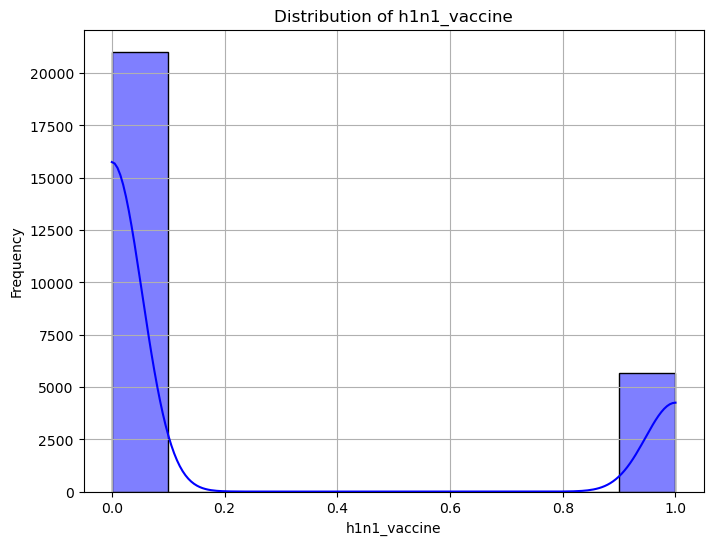

In [171]:
# Visualize the  distribution of'h1n1_vaccine'
plt.figure(figsize=(8, 6))

sns.histplot(H1N1_df_numeric1['h1n1_vaccine'], bins=10, kde=True, color='blue')
plt.title('Distribution of h1n1_vaccine')
plt.xlabel('h1n1_vaccine')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

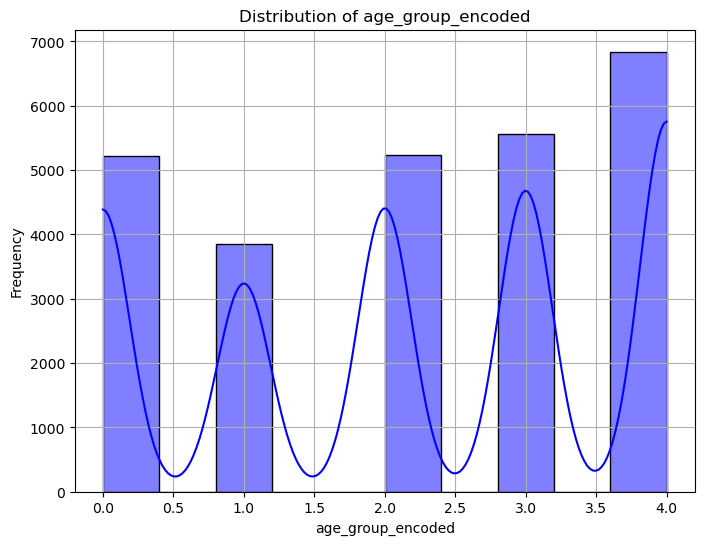

In [172]:
# Visualize the  distribution of'age_group_encoded'
plt.figure(figsize=(8, 6))

sns.histplot(H1N1_df_numeric1['age_group_encoded'], bins=10, kde=True, color='blue')
plt.title('Distribution of age_group_encoded')
plt.xlabel('age_group_encoded')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

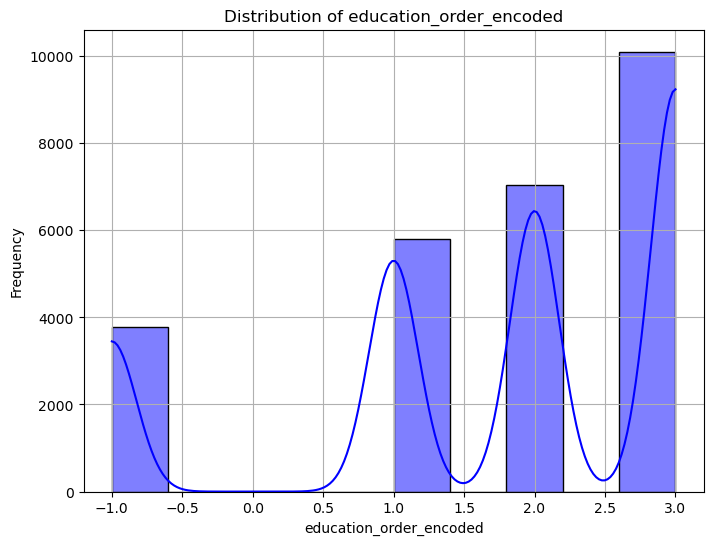

In [173]:
# Visualize the  distribution of'education_order_encoded'
plt.figure(figsize=(8, 6))

sns.histplot(H1N1_df_numeric1['education_order_encoded'], bins=10, kde=True, color='blue')
plt.title('Distribution of education_order_encoded')
plt.xlabel('education_order_encoded')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

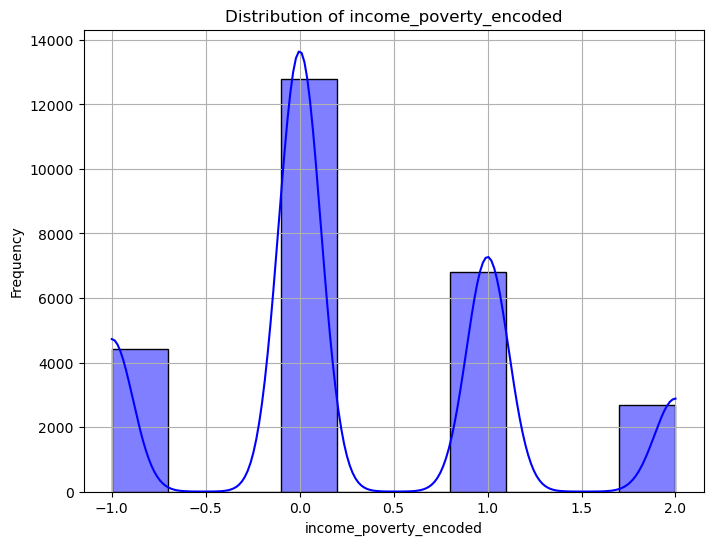

In [174]:
# Visualize the  distribution of'income_poverty_encoded'
plt.figure(figsize=(8, 6))

sns.histplot(H1N1_df_numeric1['income_poverty_encoded'], bins=10, kde=True, color='blue')
plt.title('Distribution of income_poverty_encoded')
plt.xlabel('income_poverty_encoded')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

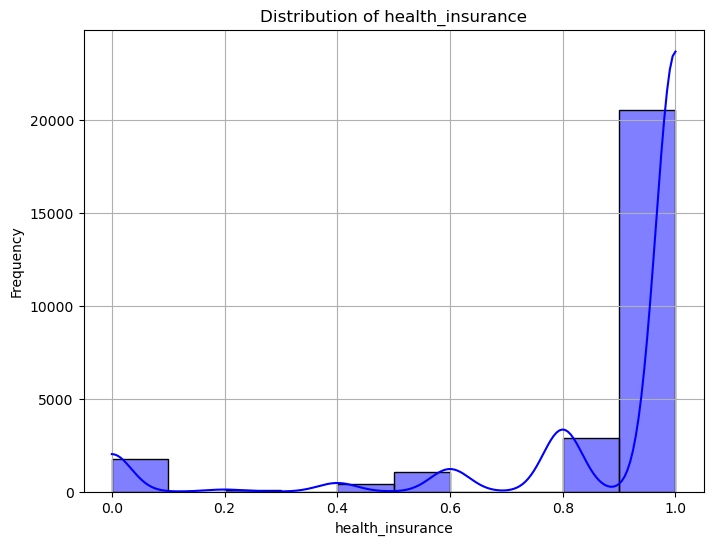

In [175]:
# Visualize the  distribution of'health_insurance'
plt.figure(figsize=(8, 6))

sns.histplot(H1N1_df_numeric1['health_insurance'], bins=10, kde=True, color='blue')
plt.title('Distribution of health_insurance')
plt.xlabel('health_insurance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

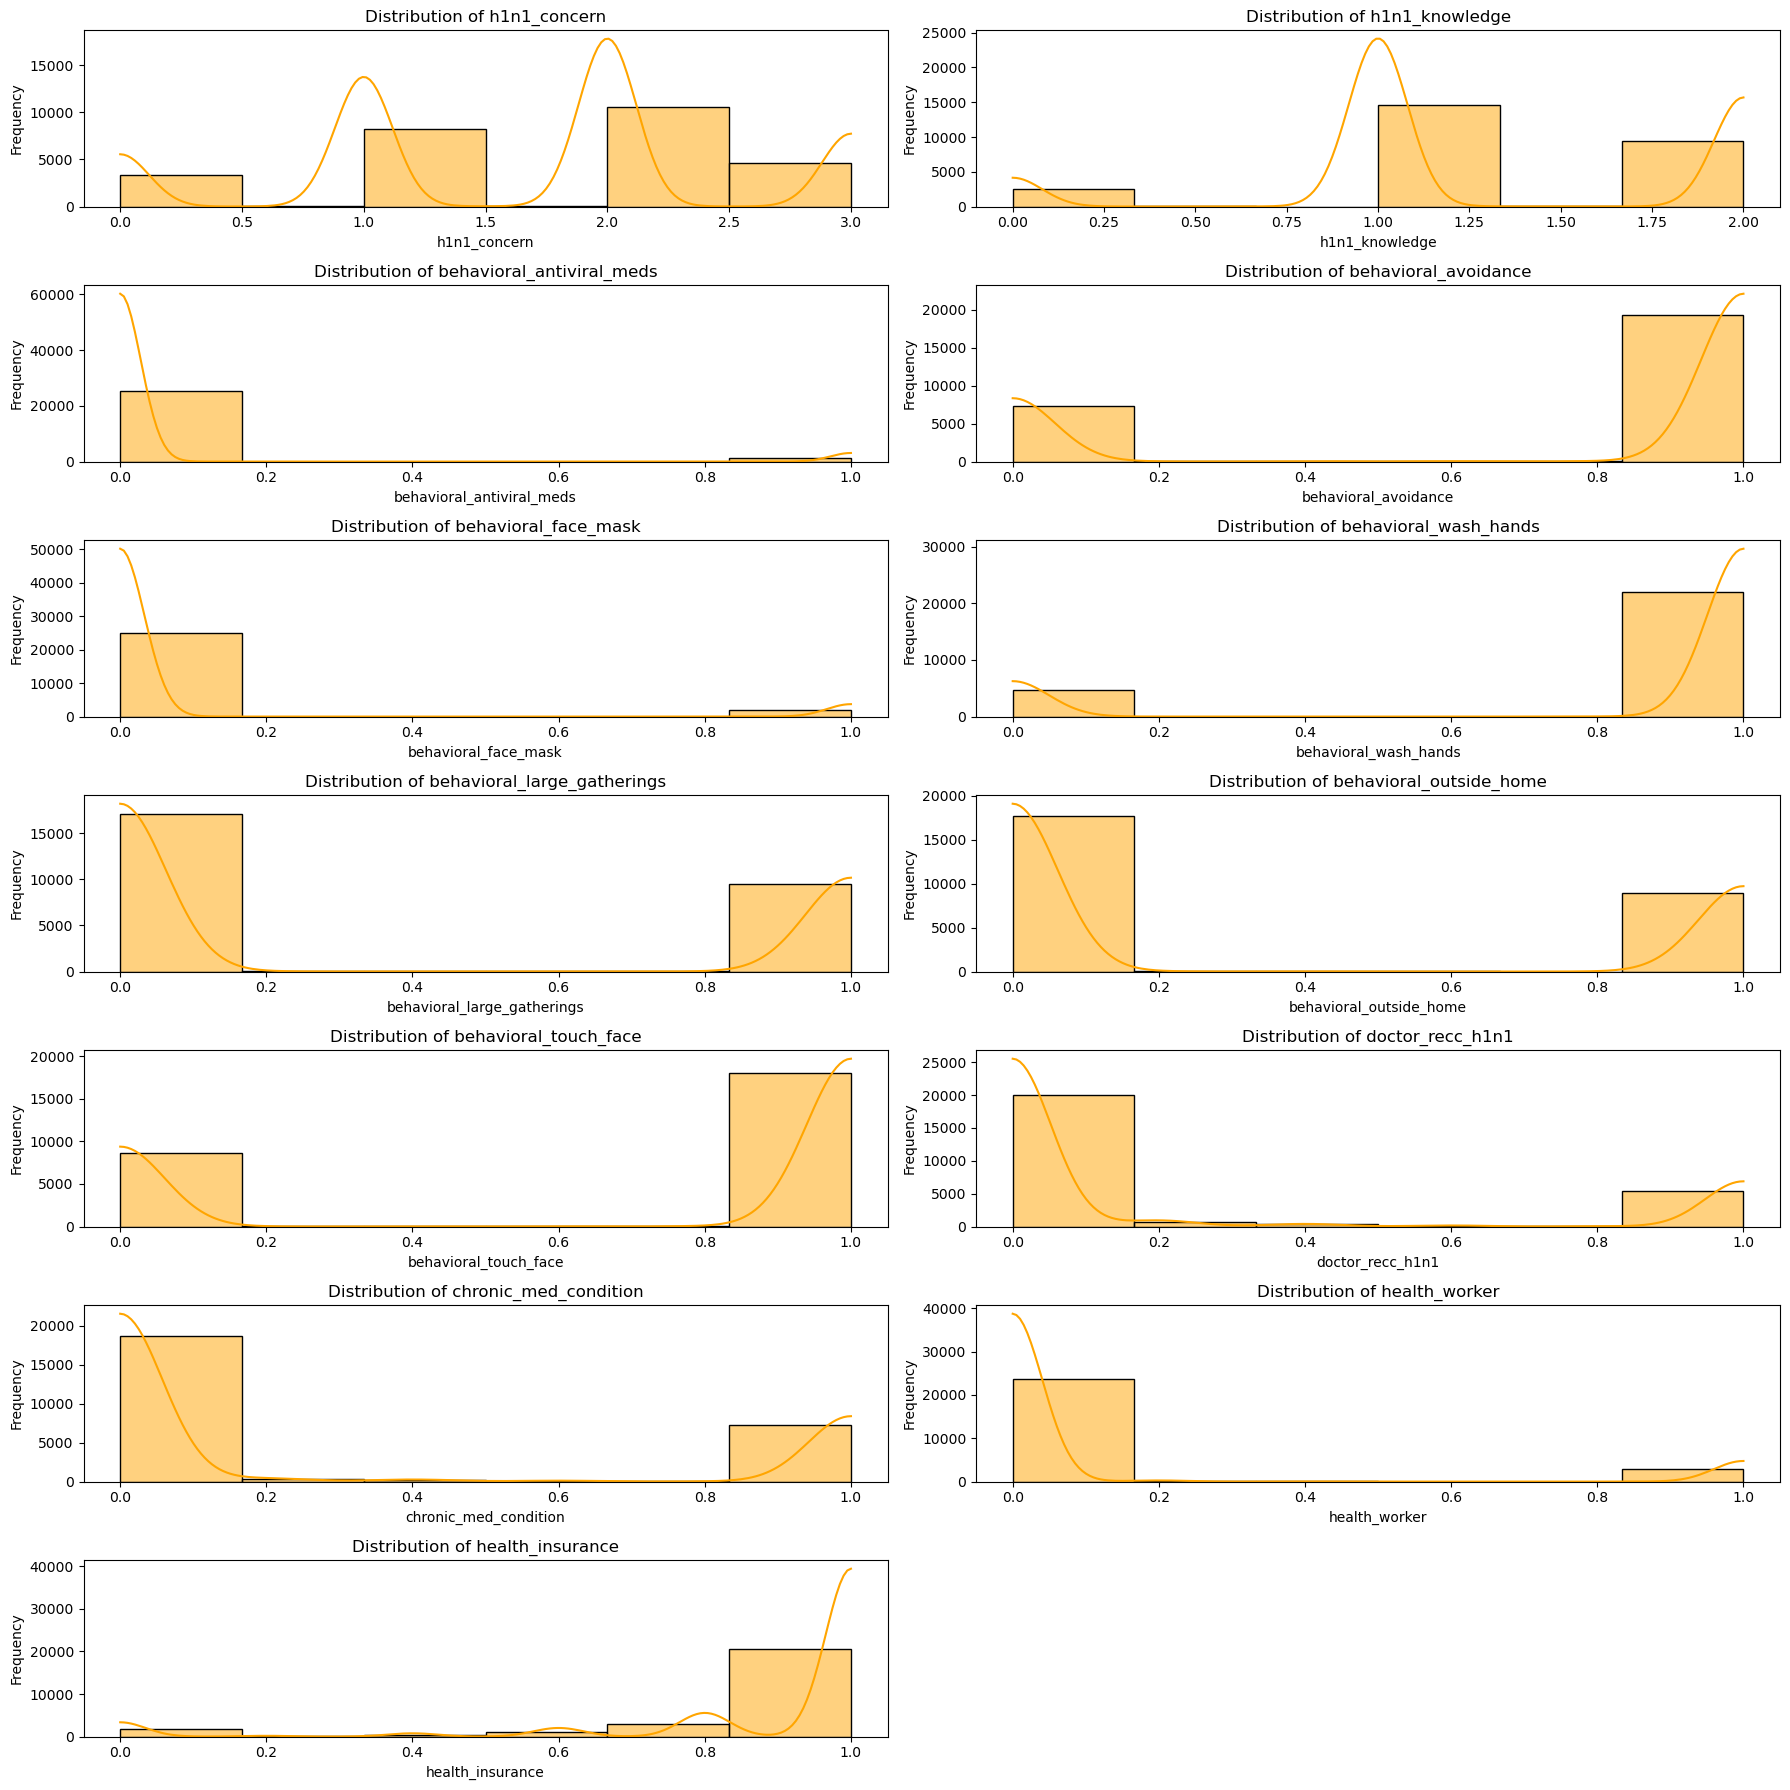

In [176]:
# Visualize distribution of each health behavior
Indicators= ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face','doctor_recc_h1n1','chronic_med_condition','health_worker', 'health_insurance']

plt.figure(figsize=(18, 18))

for i, Indicator in enumerate(Indicators, 1):
    plt.subplot(7, 2, i)
    sns.histplot(H1N1_df_numeric1[Indicator], bins=6, kde=True, color= 'orange')
    plt.title(f'Distribution of {Indicator}')
    plt.xlabel(Indicator)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

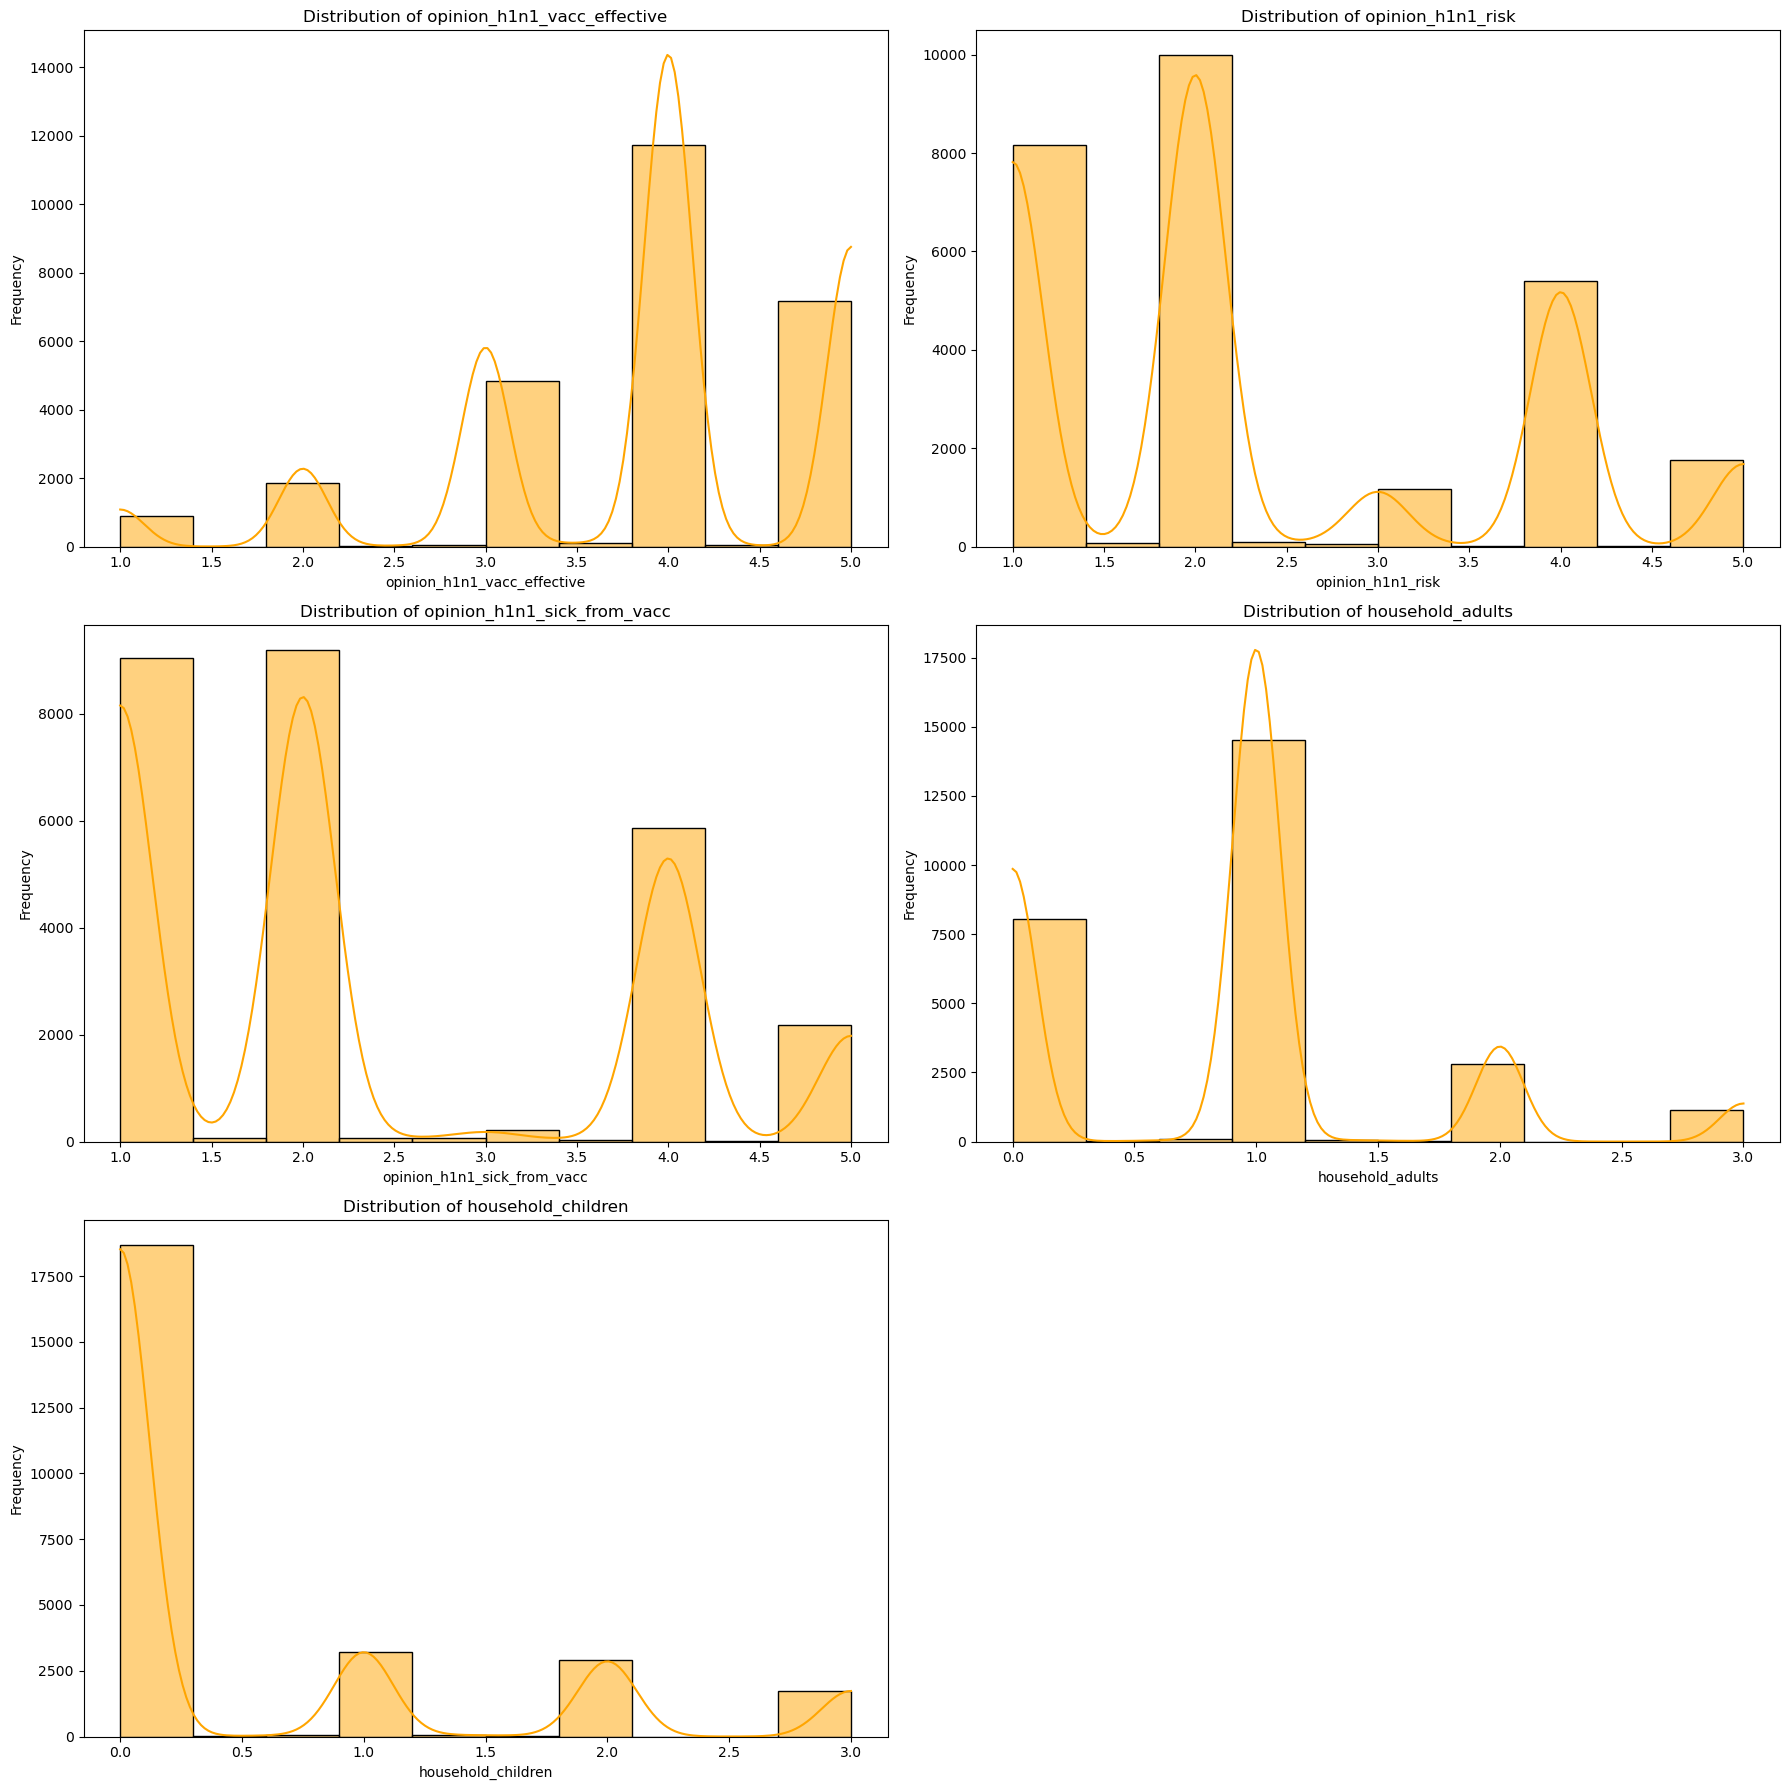

In [177]:
#Visualize distribution of each personal opinions
Indicators=['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc','household_adults', 'household_children']

plt.figure(figsize=(18, 18))

for i, Indicator in enumerate(Indicators, 1):
    plt.subplot(3, 2, i)
    sns.histplot(H1N1_df_numeric1[Indicator], bins=10, kde=True, color= 'orange')
    plt.title(f'Distribution of {Indicator}')
    plt.xlabel(Indicator)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Bivariate Analysis

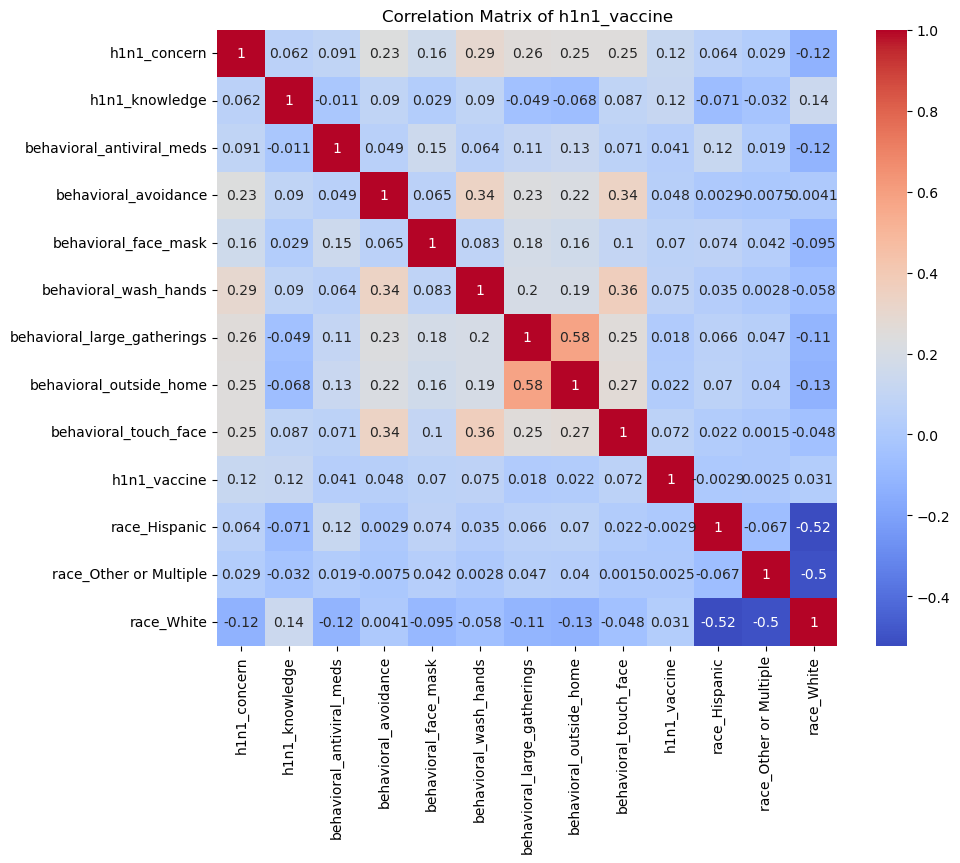

In [178]:
# Visualize correlation with h1n1_vaccine
correlation_matrix = H1N1_df_numeric1.drop(columns=['doctor_recc_h1n1', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'household_adults', 'household_children',
       'age_group_encoded', 'education_order_encoded',
       'income_poverty_encoded','census_msa_MSA, Principle City',
       'census_msa_Non-MSA', 'employment_status_Not in Labor Force',
       'employment_status_Unemployed', 'employment_status_nan',
       'employment_occupation_ccgxvspp', 'employment_occupation_cmhcxjea',
       'employment_occupation_dcjcmpih', 'employment_occupation_dlvbwzss',
       'employment_occupation_emcorrxb', 'employment_occupation_haliazsg',
       'employment_occupation_hfxkjkmi', 'employment_occupation_hodpvpew',
       'employment_occupation_kldqjyjy', 'employment_occupation_mxkfnird',
       'employment_occupation_nan', 'employment_occupation_oijqvulv',
       'employment_occupation_pvmttkik', 'employment_occupation_qxajmpny',
       'employment_occupation_rcertsgn', 'employment_occupation_tfqavkke',
       'employment_occupation_ukymxvdu', 'employment_occupation_uqqtjvyb',
       'employment_occupation_vlluhbov', 'employment_occupation_xgwztkwe',
       'employment_occupation_xqwwgdyp', 'employment_occupation_xtkaffoo',
       'employment_occupation_xzmlyyjv', 'employment_industry_atmlpfrs',
       'employment_industry_cfqqtusy', 'employment_industry_dotnnunm',
       'employment_industry_fcxhlnwr', 'employment_industry_haxffmxo',
       'employment_industry_ldnlellj', 'employment_industry_mcubkhph',
       'employment_industry_mfikgejo', 'employment_industry_msuufmds',
       'employment_industry_nan', 'employment_industry_nduyfdeo',
       'employment_industry_phxvnwax', 'employment_industry_pxcmvdjn',
       'employment_industry_qnlwzans', 'employment_industry_rucpziij',
       'employment_industry_saaquncn', 'employment_industry_vjjrobsf',
       'employment_industry_wlfvacwt', 'employment_industry_wxleyezf',
       'employment_industry_xicduogh', 'employment_industry_xqicxuve',
       'hhs_geo_region_bhuqouqj', 'hhs_geo_region_dqpwygqj',
       'hhs_geo_region_fpwskwrf', 'hhs_geo_region_kbazzjca',
       'hhs_geo_region_lrircsnp', 'hhs_geo_region_lzgpxyit',
       'hhs_geo_region_mlyzmhmf', 'hhs_geo_region_oxchjgsf',
       'hhs_geo_region_qufhixun', 'rent_or_own_Rent', 'rent_or_own_nan','marital_status_Not Married', 'marital_status_nan', 'sex_Male']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of h1n1_vaccine')
plt.show()


Inferences:

Fair Relationship with behavioral_wash_hands: The correlation plot places behavioral_wash_hands as a slightly fair influencer of the uptake of h1n1_vaccine with a correlation coefficient of 0.075 , followed by correlation coefficients of 0.072, 0.070, for  'behavioral_touch_face, and behavioral_face_mask' respectively.
Overall, the health behaviours do not contribute much to the uptake of h1n1_vaccine as compared to the opinions of the persons.

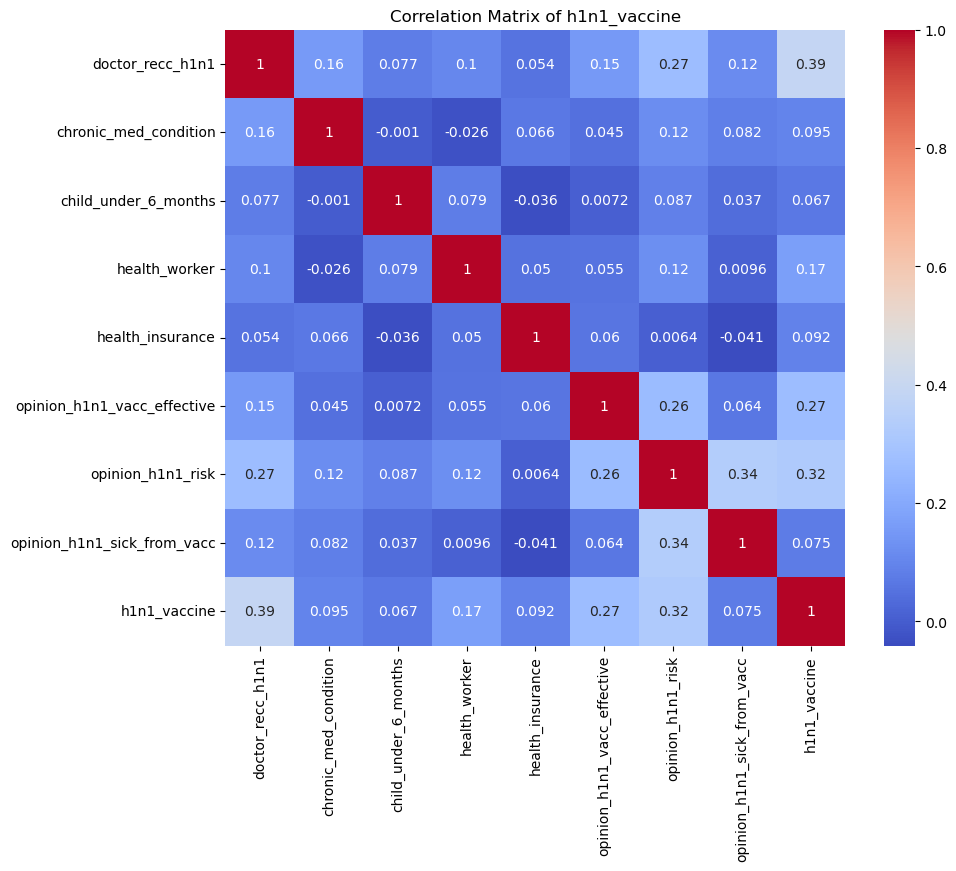

In [219]:
# Visualize correlation with h1n1_vaccine
correlation_matrix = H1N1_df_numeric1.drop(columns=['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home','behavioral_touch_face','marital_status_Not Married', 'marital_status_nan', 'sex_Male',
       'race_Hispanic', 'race_Other or Multiple', 'race_White', 'household_adults', 'household_children',
       'age_group_encoded', 'education_order_encoded','income_poverty_encoded','census_msa_MSA, Principle City',
       'census_msa_Non-MSA', 'employment_status_Not in Labor Force',
       'employment_status_Unemployed', 'employment_status_nan',
       'employment_occupation_ccgxvspp', 'employment_occupation_cmhcxjea',
       'employment_occupation_dcjcmpih', 'employment_occupation_dlvbwzss',
       'employment_occupation_emcorrxb', 'employment_occupation_haliazsg',
       'employment_occupation_hfxkjkmi', 'employment_occupation_hodpvpew',
       'employment_occupation_kldqjyjy', 'employment_occupation_mxkfnird',
       'employment_occupation_nan', 'employment_occupation_oijqvulv',
       'employment_occupation_pvmttkik', 'employment_occupation_qxajmpny',
       'employment_occupation_rcertsgn', 'employment_occupation_tfqavkke',
       'employment_occupation_ukymxvdu', 'employment_occupation_uqqtjvyb',
       'employment_occupation_vlluhbov', 'employment_occupation_xgwztkwe',
       'employment_occupation_xqwwgdyp', 'employment_occupation_xtkaffoo',
       'employment_occupation_xzmlyyjv', 'employment_industry_atmlpfrs',
       'employment_industry_cfqqtusy', 'employment_industry_dotnnunm',
       'employment_industry_fcxhlnwr', 'employment_industry_haxffmxo',
       'employment_industry_ldnlellj', 'employment_industry_mcubkhph',
       'employment_industry_mfikgejo', 'employment_industry_msuufmds',
       'employment_industry_nan', 'employment_industry_nduyfdeo',
       'employment_industry_phxvnwax', 'employment_industry_pxcmvdjn',
       'employment_industry_qnlwzans', 'employment_industry_rucpziij',
       'employment_industry_saaquncn', 'employment_industry_vjjrobsf',
       'employment_industry_wlfvacwt', 'employment_industry_wxleyezf',
       'employment_industry_xicduogh', 'employment_industry_xqicxuve',
       'hhs_geo_region_bhuqouqj', 'hhs_geo_region_dqpwygqj',
       'hhs_geo_region_fpwskwrf', 'hhs_geo_region_kbazzjca',
       'hhs_geo_region_lrircsnp', 'hhs_geo_region_lzgpxyit',
       'hhs_geo_region_mlyzmhmf', 'hhs_geo_region_oxchjgsf',
       'hhs_geo_region_qufhixun', 'rent_or_own_Rent', 'rent_or_own_nan']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of h1n1_vaccine')
plt.show()

**Inferences:**

Fair Relationship with doctor_recc_h1n1 : The correlation plot places doctor_recc_h1n1 as a strong influencer of h1n1_vaccine with correlation coefficient of 0.39, followed by correlation coefficiencie of 0.32, 0.27 of opinion_h1n1_risk and 'opinion_h1n1_vacc_effective'respectively.

Overall, the opinion behaviours fairly predict the uptake of h1n1_vaccine.


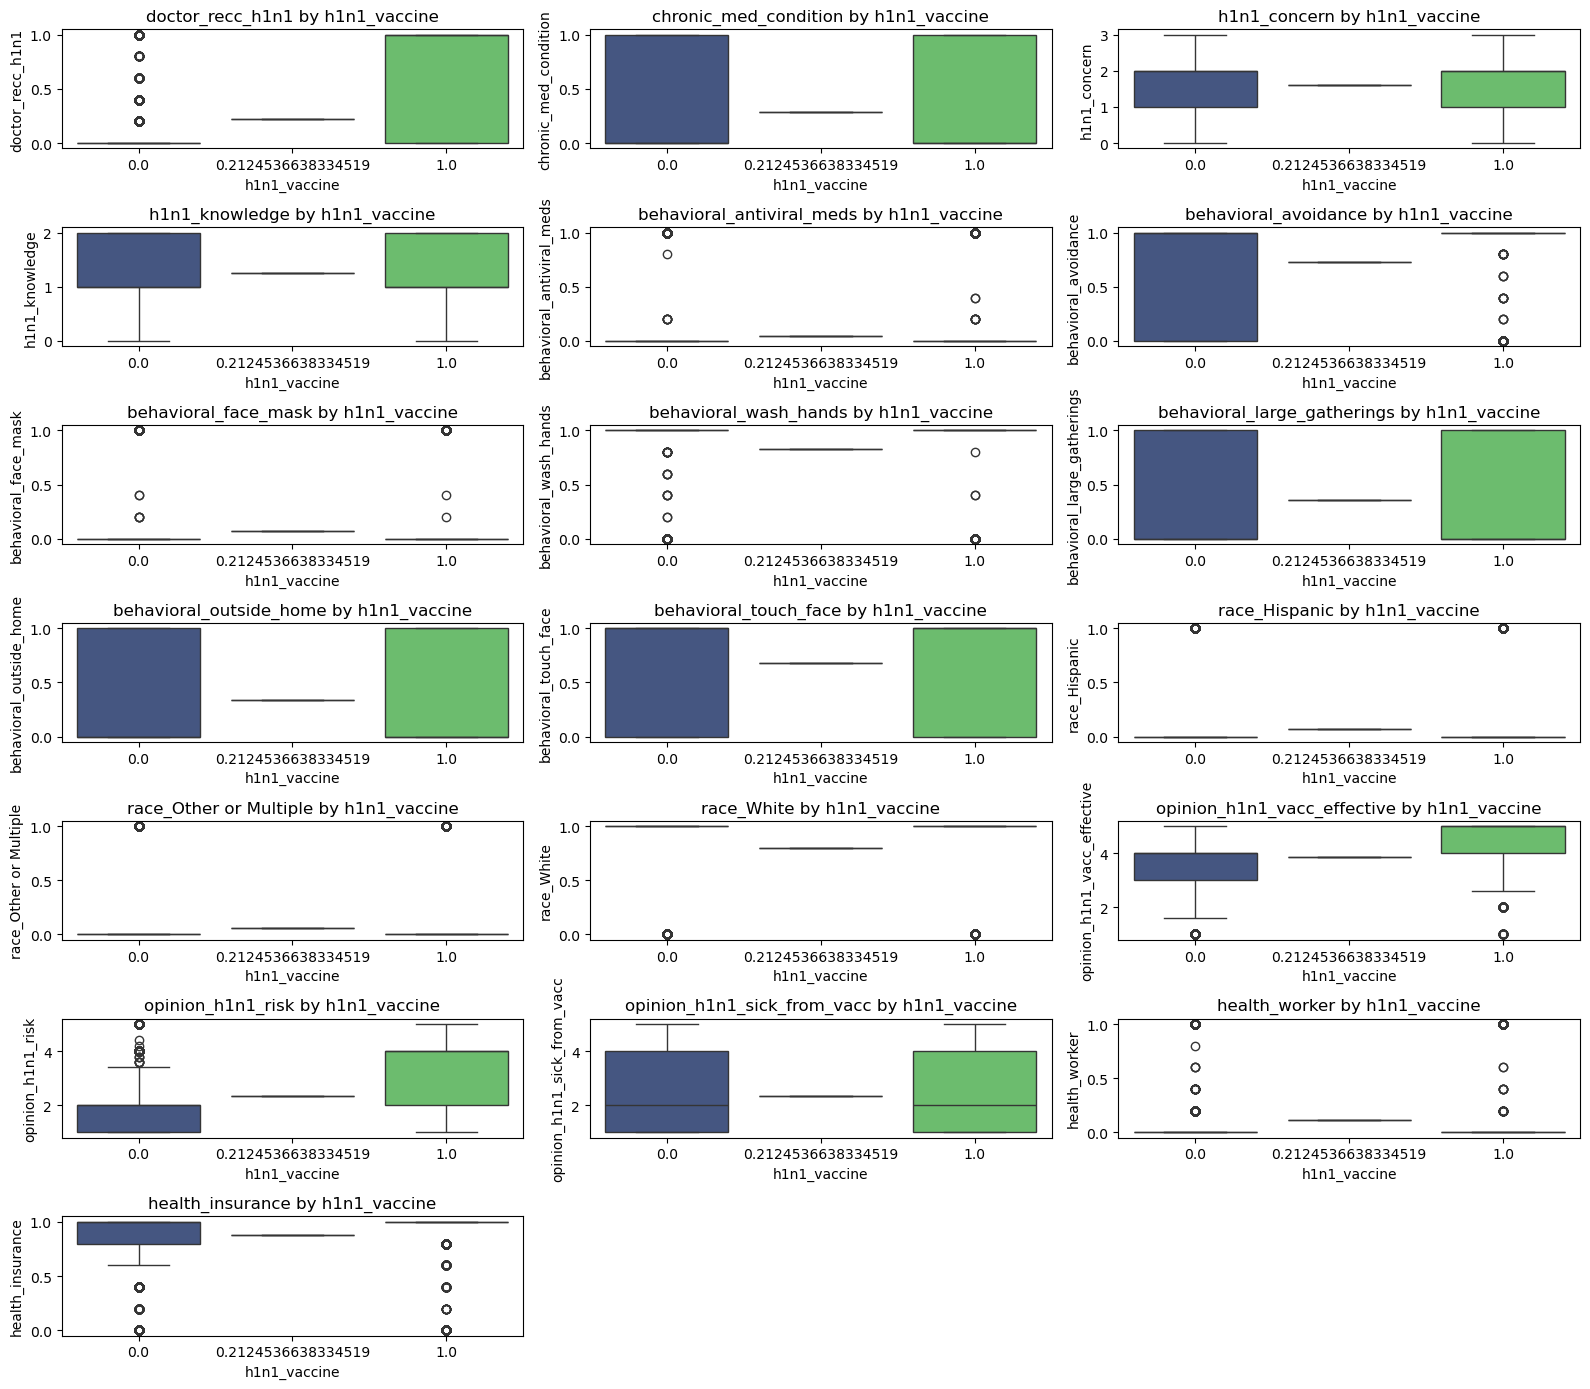

In [223]:
# Visualize distribution of indicators by feature
Indicators= ['doctor_recc_h1n1','chronic_med_condition','h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face','race_Hispanic','race_Other or Multiple','race_White','opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc','health_worker','health_insurance']

plt.figure(figsize=(16, 14))

for i, Indicator in enumerate(Indicators, 1):
    plt.subplot(7, 3, i)
    sns.boxplot(x='h1n1_vaccine', y=Indicator, data=H1N1_df_numeric1, palette='viridis')
    plt.title(f'{Indicator} by h1n1_vaccine')
    plt.xlabel('h1n1_vaccine')
    plt.ylabel(Indicator)

plt.tight_layout()
plt.show()


In [181]:
H1N1_df_model=H1N1_df_numeric1[['h1n1_concern','h1n1_knowledge','behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face','race_Hispanic','race_Other or Multiple','race_White','age_group_encoded','education_order_encoded','income_poverty_encoded','doctor_recc_h1n1','chronic_med_condition','h1n1_concern','h1n1_knowledge','behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face','race_Hispanic','race_Other or Multiple','race_White','opinion_h1n1_vacc_effective','opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc','health_worker','health_insurance','h1n1_vaccine']]
                                        

## 4. Data Preprocessing

4.1 Data Splitting

In [228]:
# Separate features and target
X = H1N1_df_model.drop(columns=['h1n1_vaccine'])
y = H1N1_df_model['h1n1_vaccine']

In [229]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [230]:
X_train.shape, y_train.shape

((21364, 34), (21364,))

In [231]:
X_test.shape, y_test.shape

((5341, 34), (5341,))

4.2 Feature Scaling

In [232]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

4.3 Handling Class Imbalance

In [233]:
# Check the class distribution before applying SMOTE
print(f"Class distribution before SMOTE: {Counter(y_train)}")

Class distribution before SMOTE: Counter({0.0: 16829, 1.0: 4534, 0.2124536638334519: 1})


In [234]:
y_train = y_train.astype(int)

In [235]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [236]:
# Check the class distribution after SMOTE
print(f"Class distribution after SMOTE: {Counter(y_train_res)}")

Class distribution after SMOTE: Counter({0: 16830, 1: 16830})


## 5. Model Development

In [237]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, f1_score, precision_score, recall_score

In [238]:
def evaluate_model(model, X_train_res, y_train_res, X_test_scaled, y_test):
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test_scaled)
    y_scores = model.predict_proba(X_test_scaled)[:, 1]
    # Calculate various metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_scores, average='weighted')

    # Generate classification report
    class_report = classification_report(y_test, y_pred, output_dict=True)

    # Create a DataFrame for metrics
    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC Score'],
        model.__class__.__name__: [accuracy, f1, precision, recall, roc_auc]
    })

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=list(set(y_test)), yticklabels=list(set(y_test)))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    plt.tight_layout()

    # Plot ROC curves for each class
    plot_roc_curve(model, X_test_scaled, y_test)

    return metrics_df


In [239]:
def plot_roc_curve(model, X_test_scaled, y_test):
    y_pred_proba = model.predict_proba(X_test_scaled)
    n_classes = len(np.unique(y_test))

    plt.figure(figsize=(8, 5))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.4f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

5.1 Logistic Regression

Logistic Regression Evaluation:


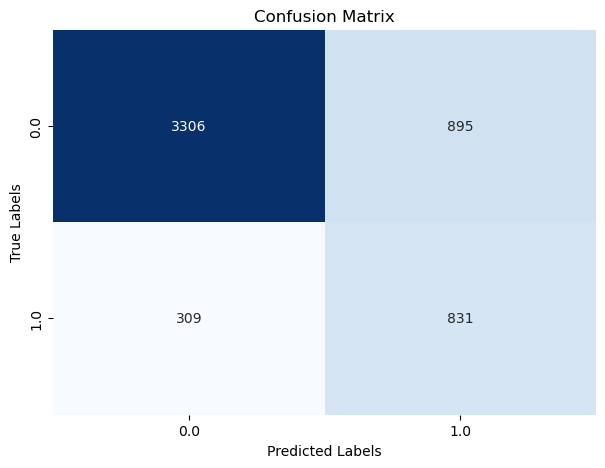

<Figure size 640x480 with 0 Axes>

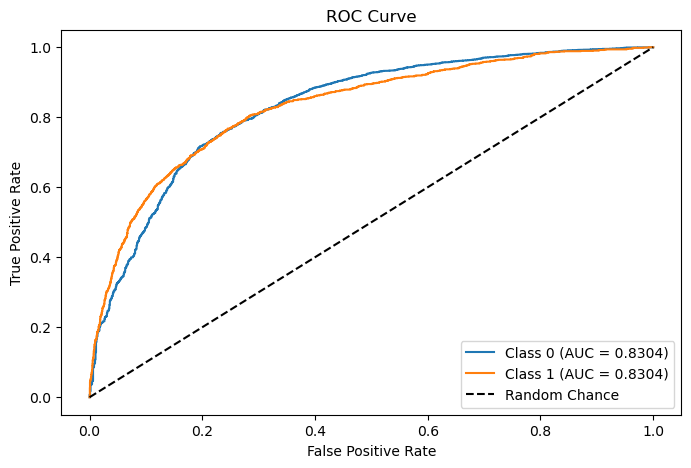

,Metric,LogisticRegression
0,Accuracy,0.774574
1,F1 Score,0.789169
2,Precision,0.822089
3,Recall,0.774574
4,ROC AUC Score,0.830388


In [240]:
logreg = LogisticRegression(random_state=42, max_iter=1000)
print("Logistic Regression Evaluation:")
logreg_metrics_df = evaluate_model(logreg, X_train_res, y_train_res, X_test_scaled, y_test)
logreg_metrics_df

**Logistic Regression Evaluation (Baseline Model)**

The Logistic Regression model has fair scores in correctly predicting the majority class; its misclassifications are few across all classes.

*Accuracy:* 0.774574, fair.

*F1 Score:* 0.78919, showing fair balance between precision and recall.

*Precision:* 0.822089 indicates that when the model predicts a target, it is often correct.

*Recall:* 0.774574, implies that the model misses few positive instances.

*ROC AUC:* 0.83038, it suggests a reasonable discriminative ability, though failing to effectively predict minority classes.

**Justification:**
The Logistic Regression is ok.

5.2 Random Forest (Before Tuning)

Random Forest Evaluation:


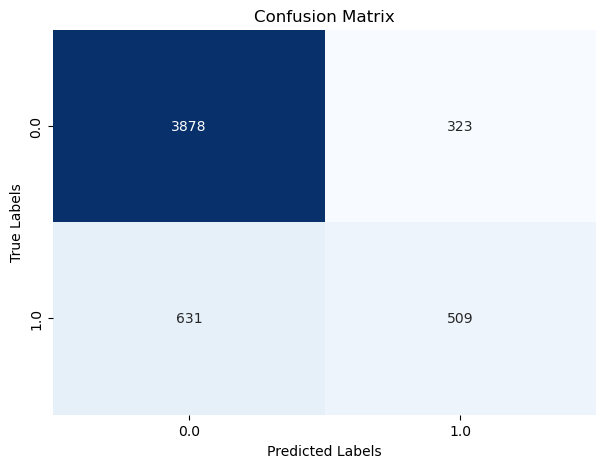

<Figure size 640x480 with 0 Axes>

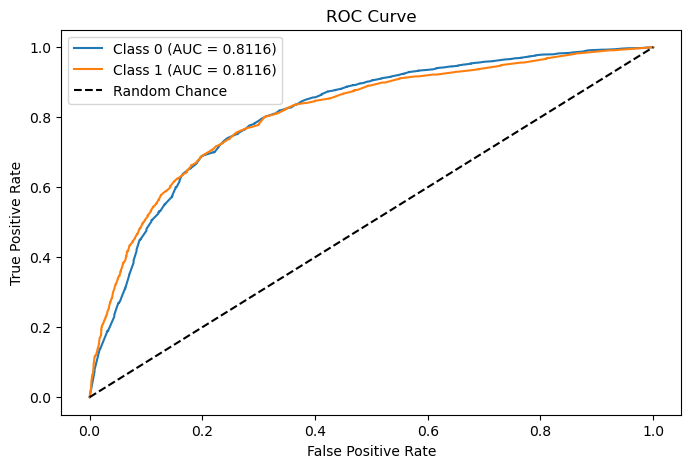

,Metric,RandomForestClassifier
0,Accuracy,0.821382
1,F1 Score,0.810591
2,Precision,0.807064
3,Recall,0.821382
4,ROC AUC Score,0.811636


In [241]:
rf1 = RandomForestClassifier(random_state=42)
print("Random Forest Evaluation:")
rf1_metrics_df = evaluate_model(rf1, X_train_res, y_train_res, X_test_scaled, y_test)
rf1_metrics_df

**Random Forest Evaluation(Before Tuning)**

The Random Forest model outperforms Logistic Regression by a small margin in terms of classification accuracy, correctly classifying most samples.


*Accuracy:* 0.821382, better than Logistic Regression.

*F1 Score:* 0.810591, indicating a good balance between precision and recall.

*Precision:* 0.807064, indicative of low predictive accuracy compared to logistic regression.

*Recall:* 0.821382, reflecting effective identification of positive cases.

*ROC AUC:* 0.811636, confirming the model’s strong ability to distinguish between features but lower than logistic regression.

**Justification:**
The untuned Random Forest model compared to Logistic Regression is a small jump in performance, especially considering accuracy and F1 score, since it handled class imbalance quite well. However,  its has low  discriminative power-as evidenced by the ROC AUC metric, hence the two models can complement each other in  the project.

5.3 Random Forest (After Tuning)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:
 {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40}
Best F1 Score:
 0.8792933220732863

Random Forest with Best Parameters Evaluation:


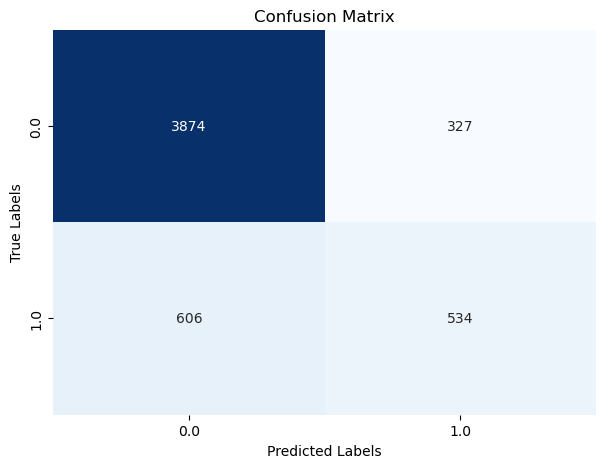

<Figure size 640x480 with 0 Axes>

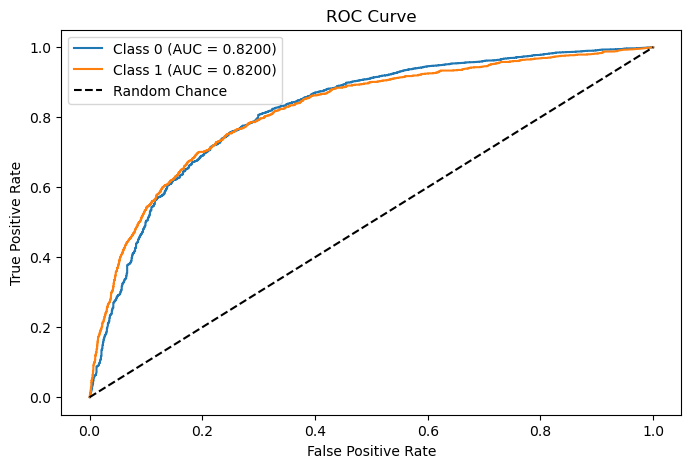

,Metric,RandomForestClassifier
0,Accuracy,0.825314
1,F1 Score,0.815942
2,Precision,0.812540
3,Recall,0.825314
4,ROC AUC Score,0.819959


In [242]:
# Define parameter distribution for Randomized Search
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize and perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2,
    random_state=42
)
random_search.fit(X_train_res, y_train_res)

# Print best parameters and score
print("Best Parameters:\n", random_search.best_params_)
print("Best F1 Score:\n", random_search.best_score_)

# Get and evaluate the best Random Forest model
tuned_rf = random_search.best_estimator_

print("\nRandom Forest with Best Parameters Evaluation:")
tuned_rf_metrics_df = evaluate_model(tuned_rf, X_train_res, y_train_res, X_test_scaled, y_test)
tuned_rf_metrics_df

**Random Forest Evaluation (After Tuning)**

Tuning made fair adjustments, performance improved better than the untuned Random Forest. As shown by the confusion matrix, misclassifications persist, particularly in the minority classes, with the second class showing the most confusion.

*Accuracy:* 0.825314, nearly unchanged from the untuned model.

*F1 Score:* 0.8155942, close to the untuned performance.

*Precision:* 0.812540, strong but slightly higher than before tuning.

*Recall:* 0.825314, consistent with accuracy.

*ROC AUC:* 0.819959, showing minimal impact from tuning on class differentiation.

**Justification:** As there were slight improvements resulting from hyperparameter tuning, the tuned Random Forest brcomes the preferred model for this project.

5.4 Model Comparison

In [243]:
# Merge DataFrames for comparison
combined_metrics_df = pd.concat([logreg_metrics_df, rf1_metrics_df, tuned_rf_metrics_df], axis=1)
combined_metrics_df.columns = ['Metric', 'Logistic Regression', 'Metric', 'RF Before Tuning', 'Metric', 'RF After Tuning']
combined_metrics_df = combined_metrics_df.loc[:, ~combined_metrics_df.columns.duplicated()]
combined_metrics_df


,Metric,Logistic Regression,RF Before Tuning,RF After Tuning
0,Accuracy,0.774574,0.821382,0.825314
1,F1 Score,0.789169,0.810591,0.815942
2,Precision,0.822089,0.807064,0.812540
3,Recall,0.774574,0.821382,0.825314
4,ROC AUC Score,0.830388,0.811636,0.819959


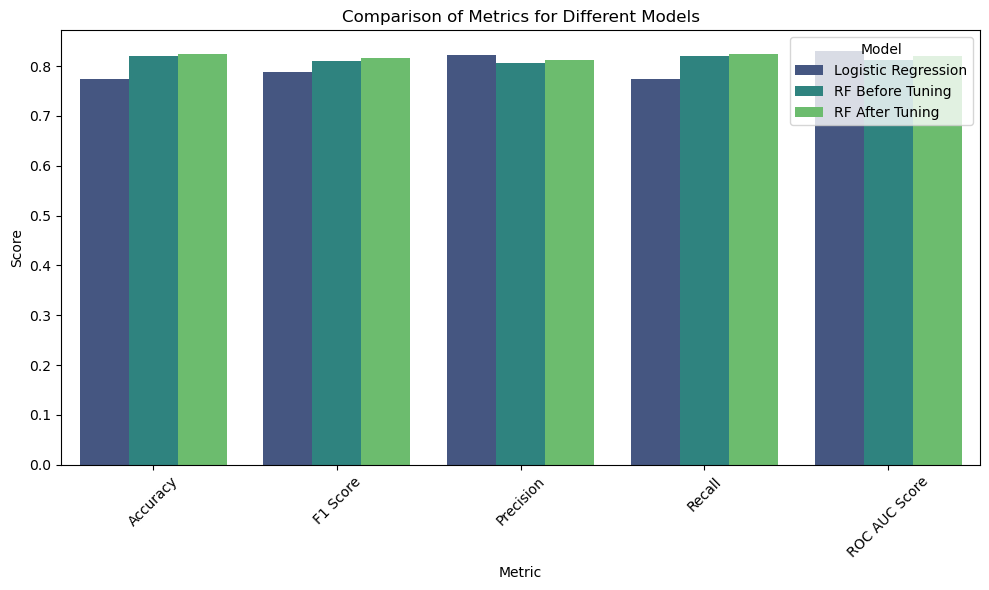

In [244]:
# Melt the DataFrame to long format for better plotting
melted_df = combined_metrics_df.melt(id_vars='Metric',
                                      value_vars=['Logistic Regression', 'RF Before Tuning', 'RF After Tuning'],
                                      var_name='Model',
                                      value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x='Metric', y='Score', hue='Model', palette='viridis')
plt.title('Comparison of Metrics for Different Models')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.tight_layout()
plt.show()


In [245]:
# rf before tuning(rf1) has the best performance
best_model = rf1

**Final Model Justification**

Having tried both the Logistic Regression and Random Forest models, it became clear that the tuned Random Forest model significantly outperforms Logistic Regression in both key metrics of accuracy, F1 score, and robustness towards class imbalance. Logistic Regression, while simple and interpretable, was insufficient to capture the complexity in the data and thus reflected lower performance metrics.

On the contrary, the Random Forest algorithm performed much better in modeling such complex relations between variables of the dataset and was more suitable for this project.

 The tuned model handling class imbalance with high performance is very reliable and robust to predict the h1n1_vaccine uptake across the features. This will ensure that the model provides accurate and actionable insights for decision-making that aligns well with the project objectives.



5.5 Model validation

In [246]:
def cross_validation_scores(model, X, y, cv_folds):
    scoring = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']
    cv_results = {metric: cross_val_score(model, X, y, cv=cv_folds, scoring=metric) for metric in scoring}

    print("Cross-Validation Metrics:")
    for metric, scores in cv_results.items():
        print(f"Cross-Validation {metric.replace('_', ' ').title()}: Mean = {scores.mean():.4f}, Std Dev = {scores.std():.4f}")

# Perform Cross-Validation
print("Cross-Validation for Best Random Forest Model:")
cross_validation_scores(best_model, X_train_scaled, y_train, cv_folds=5)


Cross-Validation for Best Random Forest Model:
Cross-Validation Metrics:
Cross-Validation Accuracy: Mean = 0.8254, Std Dev = 0.0044
Cross-Validation F1 Weighted: Mean = 0.8095, Std Dev = 0.0046
Cross-Validation Precision Weighted: Mean = 0.8086, Std Dev = 0.0055
Cross-Validation Recall Weighted: Mean = 0.8254, Std Dev = 0.0044


**Final Model Performance Summary**

The selected model performs quite well on average, with the mean value of 0.8254, whereby most of the features are rightly predicted. This gives quite promising results toward h1n1_vaccine prediction with respect to features.

The high mean F1 score of 0.8095 implies that the model has a good balance of precision and recall, which is something that will be very useful in this instance, since it's a multi-class problem.

With an average precision of 0.8086, the model does generally well in predicting the actual positives correctly. This is important for correctly classifying features.

A high recall would mean that the model is good at finding examples from all featurs, which is important to ensure all relevant cases are detected. Mean Recall: 0.8254.

5.6 Model Evaluation on Test Set


Test Set Evaluation for Best Random Forest Model:

Test Set Metrics:
Accuracy: 0.8214
F1 Score: 0.8106
Precision: 0.8071
Recall: 0.8214
ROC AUC Score: 0.8116


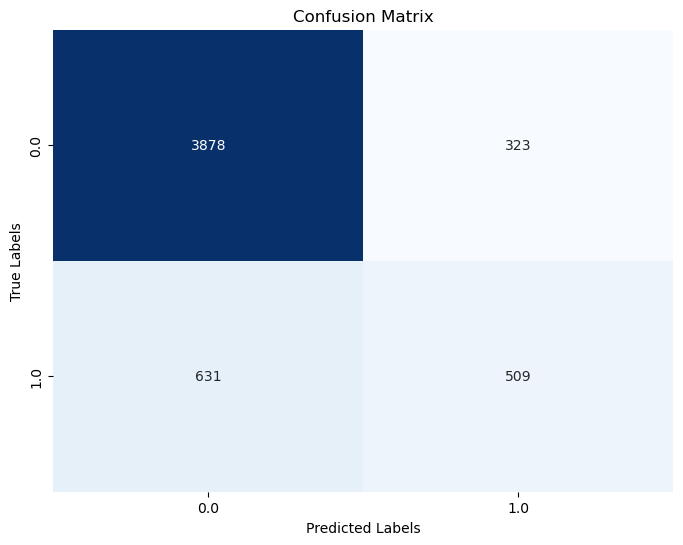

In [247]:
def test_set_evaluation(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_scores = model.predict_proba(X_test_scaled)[:, 1]
    test_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'ROC AUC Score': roc_auc_score(y_test, y_scores, average='weighted')
    }

    print("\nTest Set Metrics:")
    for metric, score in test_metrics.items():
        print(f"{metric}: {score:.4f}")

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=y_test.unique(), yticklabels=y_test.unique())
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Evaluate on Test Set
print("\nTest Set Evaluation for Best Random Forest Model:")
test_set_evaluation(best_model, X_test_scaled, y_test)


During the evaluation of the Random Forest model, general metrics seemed strong, which supported that the model was good at predicting h1n1_vaccine uptake across the board.
However, the model faced challenges with certain underrepresented classes, which can be attributed to class imbalances in the dataset.

5.7 Feature Importance

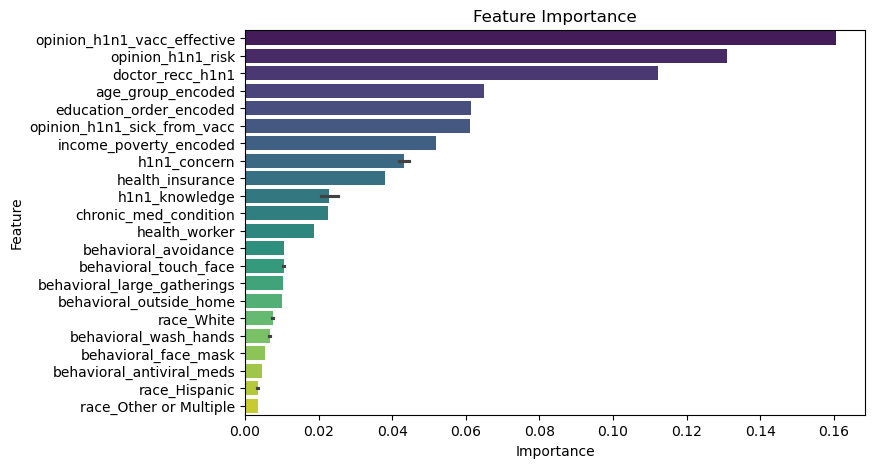

In [248]:
importances = best_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('feature_importance.png')
plt.show()


The most important features that contribute to the uptake of h1n1_vaccine in descending order are opinion_h1_vacc_effective, opinion_h1n1_risk,doctor_recc_h1n1, age_group_encoded, education_order_encoded, opinion_h1n1_sick_from_vacc and income_poverty_encoded .

## 6. Conclusion

The Random Forest-based model, developed in this research for estimating h1n1_vaccine uptake has shown excellent performance. It has achieved 82.14% accuracy and an F1 score of 81.06% on the test set, proving fairly efficient in estimating  h1n1_vaccine uptake. Overall, the model performs with quite high accuracy and balanced metrics, which suggests that it reliably predicts h1n1_vaccine uptake without considerable bias.

Key predictors derived from the feature importance analysis are opinion_h1_vacc_effective, opinion_h1n1_risk,doctor_recc_h1n1, age_group_encoded, education_order_encoded, opinion_h1n1_sick_from_vacc and , income_poverty_encoded , further evidencing that they are the major factors to describe h1ni_vaccine uptake.

Despite challenges with class imbalance, the Random Forest model presents a robust tool in h1n1_vaccine uptake predictions, which would be refined further by adding more focus on class balance.

